In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [ ]:
data=pd.read_csv('loan_data.csv')

In [ ]:
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
376,LP002953,Male,Yes,3+,Graduate,No,5703,0.0,128.0,360.0,1.0,Urban,Y
377,LP002974,Male,Yes,0,Graduate,No,3232,1950.0,108.0,360.0,1.0,Rural,Y
378,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
379,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381 entries, 0 to 380
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            381 non-null    object 
 1   Gender             376 non-null    object 
 2   Married            381 non-null    object 
 3   Dependents         373 non-null    object 
 4   Education          381 non-null    object 
 5   Self_Employed      360 non-null    object 
 6   ApplicantIncome    381 non-null    int64  
 7   CoapplicantIncome  381 non-null    float64
 8   LoanAmount         381 non-null    float64
 9   Loan_Amount_Term   370 non-null    float64
 10  Credit_History     351 non-null    float64
 11  Property_Area      381 non-null    object 
 12  Loan_Status        381 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 38.8+ KB


In [ ]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,381.000000,381.000000,381.000000,370.000000,351.000000
mean,3579.845144,1277.275381,104.986877,340.864865,0.837607
std,1419.813818,2340.818114,28.358464,68.549257,0.369338
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2600.000000,0.000000,90.000000,360.000000,1.000000
50%,3333.000000,983.000000,110.000000,360.000000,1.000000
75%,4288.000000,2016.000000,127.000000,360.000000,1.000000
max,9703.000000,33837.000000,150.000000,480.000000,1.000000


In [ ]:
data.isnull().sum()

,0
Loan_ID,0
Gender,5
Married,0
Dependents,8
Education,0
Self_Employed,21
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,11


In [ ]:
data.shape

(381, 13)

In [ ]:
print(data.isnull().sum())
data['LoanAmount'].fillna(data['LoanAmount'].median(), inplace=True)
data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].median(), inplace=True)
data['Credit_History'].fillna(data['Credit_History'].median(), inplace=True)
data['Gender'].fillna(data['Gender'].mode()[0], inplace=True)
data['Married'].fillna(data['Married'].mode()[0], inplace=True)
data['Dependents'].fillna(data['Dependents'].mode()[0], inplace=True)
data['Self_Employed'].fillna(data['Self_Employed'].mode()[0], inplace=True)

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64


<ipython-input-34-0f1b98e2f06b>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['LoanAmount'].fillna(data['LoanAmount'].median(), inplace=True)
<ipython-input-34-0f1b98e2f06b>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inpl

In [ ]:
data['Dependents'] = data['Dependents'].replace('3+', 4)

In [ ]:
data['Dependents'].fillna(data['Dependents'].mode()[0], inplace=True)
data['Dependents'] = data['Dependents'].replace('3+', '3')  # Replace '3+' with '3'
data['Dependents'] = data['Dependents'].str.replace('[^0-9]', '', regex=True) #

data['Dependents'] = pd.to_numeric(data['Dependents'], errors='coerce').fillna(0).astype(int)

In [ ]:
data.isnull().sum()

,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0
Credit_History,0


In [ ]:
#label encoding
le=LabelEncoder()
data['Gender']=le.fit_transform(data['Gender'])
data['Married']=le.fit_transform(data['Married'])
data['Education']=le.fit_transform(data['Education'])
data['Self_Employed']=le.fit_transform(data['Self_Employed'])
data['Property_Area']=le.fit_transform(data['Property_Area'])
data['Loan_Status']=le.fit_transform(data['Loan_Status'])

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381 entries, 0 to 380
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             381 non-null    int64  
 1   Married            381 non-null    int64  
 2   Dependents         381 non-null    int64  
 3   Education          381 non-null    int64  
 4   Self_Employed      381 non-null    int64  
 5   ApplicantIncome    381 non-null    int64  
 6   CoapplicantIncome  381 non-null    float64
 7   LoanAmount         381 non-null    float64
 8   Loan_Amount_Term   381 non-null    float64
 9   Credit_History     381 non-null    float64
 10  Property_Area      381 non-null    int64  
 11  Loan_Status        381 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 35.8 KB


In [ ]:
data

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,1,1,0,1,4583,1508.0,128.0,360.0,1.0,0,0
1,1,1,0,0,2,3000,0.0,66.0,360.0,1.0,2,1
2,1,1,0,1,1,2583,2358.0,120.0,360.0,1.0,2,1
3,1,0,0,0,1,6000,0.0,141.0,360.0,1.0,2,1
4,1,1,0,1,1,2333,1516.0,95.0,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
376,1,1,0,0,1,5703,0.0,128.0,360.0,1.0,2,1
377,1,1,0,0,1,3232,1950.0,108.0,360.0,1.0,0,1
378,0,0,0,0,1,2900,0.0,71.0,360.0,1.0,0,1
379,1,1,0,0,1,4106,0.0,40.0,180.0,1.0,0,1


In [ ]:
X=data.drop('Loan_Status',axis=1)
Y=data['Loan_Status']

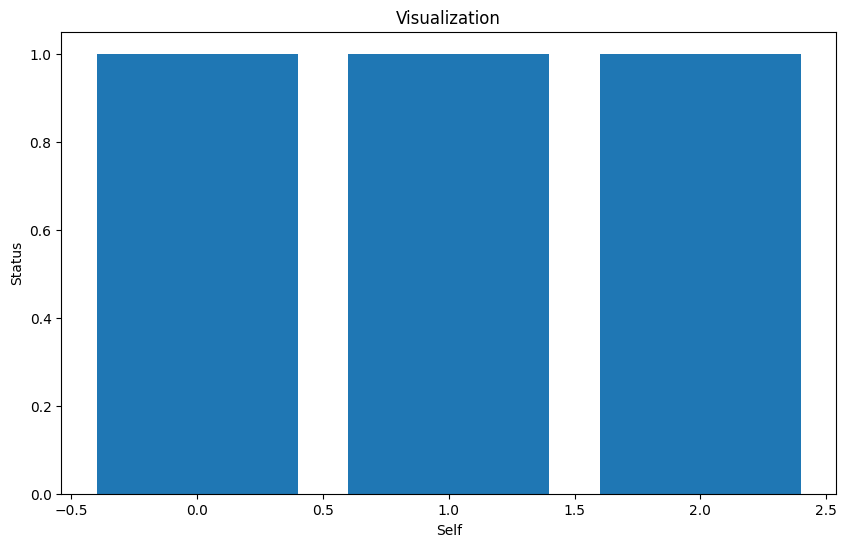

In [ ]:
plt.figure(figsize=(10, 6))
plt.bar(data['Self_Employed'],data['Loan_Status'])
plt.xlabel('Self')
plt.ylabel('Status')
plt.title('Visualization')
plt.show()

In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=2)

In [ ]:
print(X_test.shape)
print(Y_test.shape)
print(X_train.shape)
print(Y_train.shape)


(77, 11)
(77,)
(304, 11)
(304,)


In [ ]:
LR = LogisticRegression(random_state=2)
LR.fit(X_train, Y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=2)

In [ ]:
NB = GaussianNB()
NB.fit(X_train, Y_train)

GaussianNB()

In [ ]:
RF = RandomForestClassifier(random_state=2)
RF.fit(X_train, Y_train)

RandomForestClassifier(random_state=2)

In [ ]:
y_pred_LR = LR.predict(X_test)
y_pred_NB = NB.predict(X_test)
y_pred_RF = RF.predict(X_test)

In [ ]:
accuracy_score(Y_test,y_pred_LR)

0.7012987012987013

In [ ]:
accuracy_score(Y_test,y_pred_NB)

0.6493506493506493

In [ ]:
accuracy_score(Y_test,y_pred_RF)

0.8311688311688312

In [ ]:
lr_report=classification_report(Y_test,y_pred_LR)
print(lr_report)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        23
           1       0.70      1.00      0.82        54

    accuracy                           0.70        77
   macro avg       0.35      0.50      0.41        77
weighted avg       0.49      0.70      0.58        77



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
nb_report=classification_report(Y_test,y_pred_NB)
print(nb_report)

              precision    recall  f1-score   support

           0       0.30      0.13      0.18        23
           1       0.70      0.87      0.78        54

    accuracy                           0.65        77
   macro avg       0.50      0.50      0.48        77
weighted avg       0.58      0.65      0.60        77



In [ ]:
rf_report=classification_report(Y_test,y_pred_RF)
print(rf_report)

              precision    recall  f1-score   support

           0       0.92      0.48      0.63        23
           1       0.82      0.98      0.89        54

    accuracy                           0.83        77
   macro avg       0.87      0.73      0.76        77
weighted avg       0.85      0.83      0.81        77



In [ ]:
param_grid={
    'n_estimators':[50,100,200], # Corrected the typo here: 'n_estimators' instead of 'n_estimotrs'
    'max_depth':[None,5,10],
    'min_samples_split':[2,5,10],
}
grid_search=GridSearchCV(estimator=RF,param_grid=param_grid,cv=5)
grid_search.fit(X_train,Y_train)
print("Best Parameters:", grid_search.best_params_)
best_model = grid_search.best_estimator_
y_pred_RF= best_model.predict(X_test)
print("Accuracy with Best Model:", accuracy_score(Y_test, y_pred_RF))

Best Parameters: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 50}
Accuracy with Best Model: 0.8441558441558441


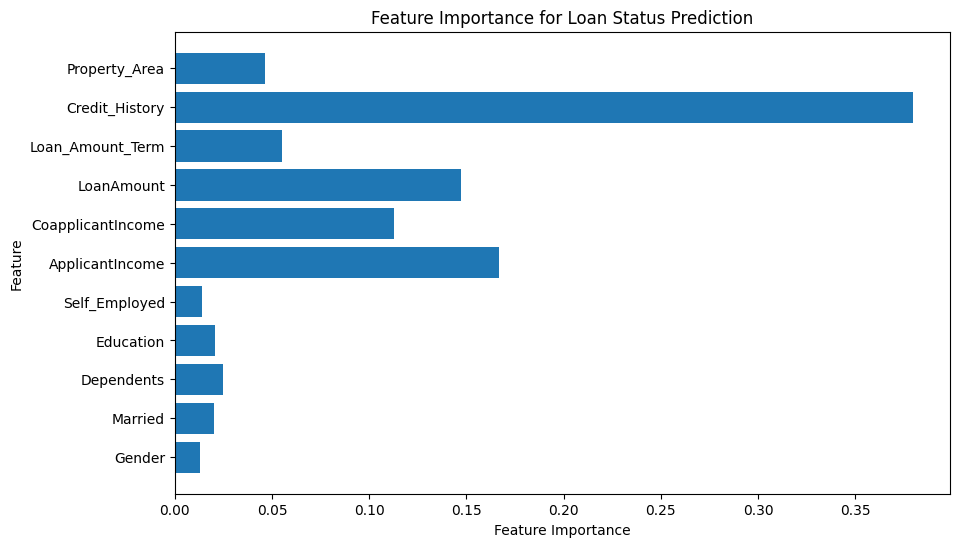

In [ ]:
importances = best_model.feature_importances_
feature_names = X.columns

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_names, importances)
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.title("Feature Importance for Loan Status Prediction")
plt.show()

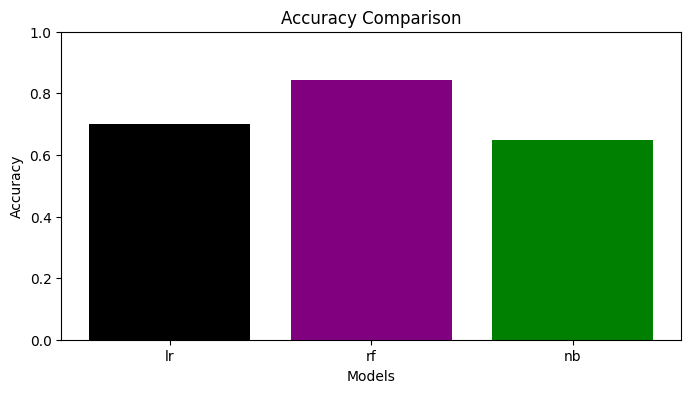

In [ ]:
models=['lr','rf','nb']
import matplotlib.pyplot as plt
accuracy=[accuracy_score(Y_test,y_pred_LR),accuracy_score(Y_test,y_pred_RF),accuracy_score(Y_test,y_pred_NB)]
plt.figure(figsize=(8,4))
plt.bar(models,accuracy,color=['Black','Purple','Green'])
plt.title('Accuracy Comparison')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.ylim(0,1)
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(Y_test,y_pred_RF)
cm

array([[12, 11],
       [ 1, 53]])

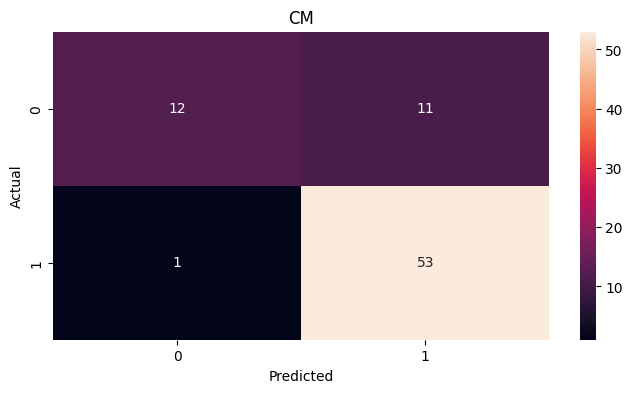

In [ ]:
plt.figure(figsize=(8,4))
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('CM')
plt.show()